<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/01_Calculo/01_Funciones/01_Funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Funciones
## Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019

*   Autores: 
    - José de Jesús Tapia López
    - Luis M. de la Cruz Salas
*   Rev: mar nov 10 12:35:18 CDT 2020

Este sitio puede ser usado libremente, tanto por profesores como por estudiantes, que deseen complementar sus cursos y conocimientos en los temas antes mencionados. Los materiales están bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

In [ ]:
# COLAB
#!git clone https://github.com/jugernaut/Prometeo.gitb #rama  master
!git clone --branch desarrollo https://github.com/jugernaut/Prometeo.git #rama desarrollo 
import Prometeo.Utils.gutils as vis

# Linux, MacOS y windows
#import os, sys
#sys.path.insert(0, os.path.abspath('../../'))
#import Utils.gutils as vis

import numpy as np
%matplotlib inline

Cloning into 'Prometeo'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 1426 (delta 49), reused 9 (delta 5), pack-reused 1333
Receiving objects: 100% (1426/1426), 12.31 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (863/863), done.


# Introducción

# Emprendiendo con Chilaquiles

Son las 7:30 am. La clase de Cálculo comienza a las 8:00 am. Tres estudiantes deciden aprovechar el tiempo e ir a desayunar chilaquiles. Pero luego de una búsqueda infructuosa, deciden regresar a la Facultad a las 7:55 am. Antes de entrar a la clase uno de ellos le dice a los otros dos:-¿No creen que sería un buen negocio poner un puesto de chilaquiles?-. Al salir de la clase, los tres estudiantes piensan que efectivamente es un buen negocio lo de los chilaquiles, así que deciden emprender. Venden los chilaquiles un día a la semana en su Facultad. La tabla que sigue muestra cómo les ha ido con las ventas:

| Semana | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|---|---|---|---|---|---|---|---|---|---|---|
| Porciones vendidas | 4 | 9 | 18 | 30 | 43 | 52 | 57 | 59 | 60 | 60 |

Como se puede observar, las ventas se han ido incrementado desde la semana 1 en la que vendieron solo 4 porciones, hasta la semana 10 en la que lograron vender 60. Parece que les está yendo muy bien y se preguntan: ¿sería buena idea dejar la Universidad y dedicarse a este negocio? 

Para responder a esta pregunta se puede hacer uso de los conocimientos de Cálculo para, de alguna manera, predecir el comportamiento de sus ventas con la información de lo que han vendido hasta ahora. Si realizamos un gráfico con los datos de la tabla anterior tenemos lo siguiente:

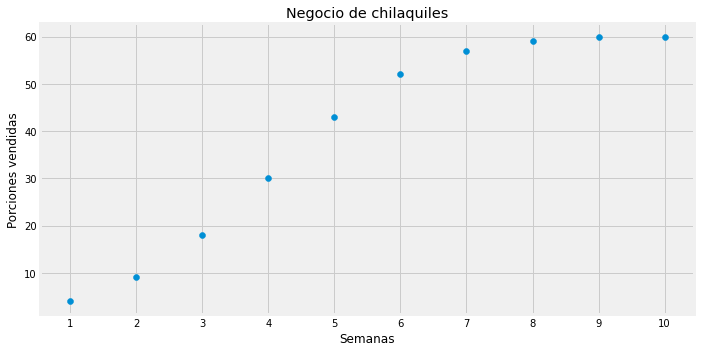

In [ ]:
# lista que contiene el número de la semana en orden ascendente
semanas   = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10] 
# lista que contiene el número de porciones conforme al número correspondiente de la semana
porciones = [ 4, 9,18,30,43,52,57,59,60,60]

# parámetros que contendrá la próxima gráfica que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Negocio de chilaquiles', 
        'xlabel':'Semanas',
        'ylabel':'Porciones vendidas'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos en la figura un diagrama de dispersión para mostrar las 
# porciones vendidas de los chilaquiles de la semana correspondiente
graf.scatter(x = semanas, y = porciones)
# las etiquetas del eje x van a ser los número de cada semana
graf.ticks(xticks = semanas)
# mostramos la figura que contiene la gráfica
graf.show()

En esta gráfica se observa que para cada valor de las semanas, se tiene uno y solo un valor de porciones vendidas. 

Si definimos lo siguiente: 

- $A = \{ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 \}$ como el conjunto que contiene el número de cada semana (**dominio**, se explica más adelante), y 
- $B = \{ 4,  9, 18, 30, 43, 52, 57, 59, 60, 60\}$ como el conjunto que contiene las porciones vendidas en cada semana (**contradominio**, se explica más adelante),

se puede decir que existe una relación $f$ que relaciona cada elemento de $A$ con uno y solo un elemento de $B$. De manera esquemática:  

$
\begin{array}{ccccccccccc}
A : & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
f :& \downarrow & \downarrow & \downarrow & \downarrow 
& \downarrow & \downarrow & \downarrow & \downarrow 
& \downarrow & \downarrow 
\\
B : & 4 &  9 & 18 & 30 & 43 & 52 & 57 & 59 & 60 & 60
\end{array}
$

Entonces $f$ es una función. Pero, ¿qué es una función?, veamos algunas definiciones y posteriormente intentemos explicar las ventas de chilaquiles usando un función adecuada.

# Funciones

En la clase de Cálculo se definen las funciones como sigue:

***
## Definición

Sean $A$ y $B$ dos conjuntos. Una relación $f$ se llama una función de $A$ en $B$ si y sólo si *a cada elemento de $A$ le corresponde uno y sólo un elemento de $B$*. 
***

El hecho de que $f$ sea una función de $A$ en $B$  se denota como $f:A\rightarrow B$. 

Al conjunto $A$ se le conoce como **dominio** de $f$ y al conjunto $B$ se le conoce como **contradominio** o **codominio** de $f$. 

Es común denotar $f(x) = y$, lo que nos dice es que la función $f$ transforma a $x$ en $y$. Se debe cumplir además que $x \in A$ y $y \in B$.

La notación $f(x) = y$ es conveniente cuando se hacen gráficos de la función, pues el eje horizontal $x$ representará al dominio, mientras que el eje vertical $y$ representará al contradominio, lo anterior en el plano Cartesiano.
 
En otras palabras, podemos decir que una función es una regla de correspondencia que asigna a cada elemento del dominio, un único elemento del contradominio.

Una definición más formal de función se puede consultar
<a href="./02_Funciones_formalismos_y_ejemplos.ipynb">aquí. </a>

### Ejemplo 1

Definimos una función $f$ cuyo dominio lo conforman los números reales $x$ que son más grandes o iguales que $-2\pi$ y menores o iguales que $2\pi$, o sea $-2\pi \leq x \leq 2 \pi$. 

La función es: $f(x) = \sin(x)$.

Sabemos, de nuestras clases de trigonometría, que $-1 \leq \sin(x) \leq 1$, entonces el codominio lo conforman los números reales que cumplen $-1 \leq y \leq 1$.

De manera más formal, definimos a la función de este ejemplo como sigue: 

$f:[-2\pi,2\pi] \rightarrow [-1,1]$, donde $f(x) = \sin(x)$.



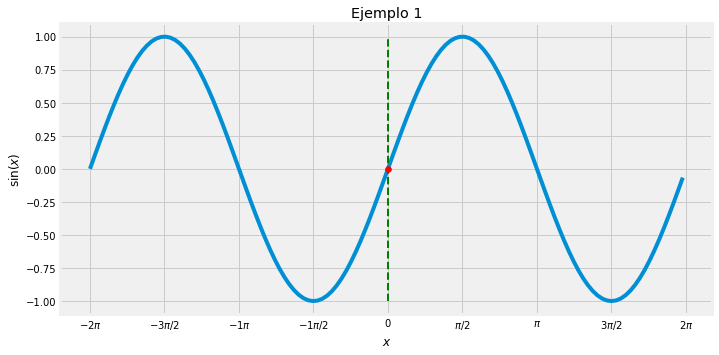

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo semiabierto [-2pi, 2pi), 
# que va del -2pi al 2pi con pasos de 0.1
x = np.arange(-2*(np.pi), 2*(np.pi), 0.1) 
# Codominio: a los valores generados en el intervalo anterior, les aplicamos la función seno
y = np.sin(x)                             

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Ejemplo 1', 
        'xlabel':'$x$',
        'ylabel':'sin($x$)'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos en la figura la función seno en el intervalo semiabierto que creamos: [-2pi, 2pi) con pasos de 0.1
graf.plot(x=x, y=y)
graf.ticks(trig=True)

N = -0.0
# graficamos en la figura una línea vertical punteada de color verde en x = 0
graf.plot(x = [np.pi*N, np.pi*N], y=[-1, 1], 
          par={'ls':'--', 'lw':2, 'color':'green'})
# graficamos en la figura un punto rojo en el (0,0)
graf.scatter(x = [np.pi*N], y=[np.sin(np.pi*N)],
            par = {'marker':'o', 'color':'red', 'zorder':10})
# mostramos la figura que contiene la gráfica, la recta vertical y el punto rojo
graf.show()

Observe que si trazamos líneas rectas verticales (línea verde punteada), éstas cortarán a la gráfica de la función (línea azul) en solo un punto (círculo rojo). A eso se refiere el enunciado: *''a cada elemento de $A$ le corresponde uno y sólo un elemento de $B$''* de la definición de función.

Intente cambiar el valor de `N` en el código anterior entre $-2\pi$ y $2\pi$ y observe que la curva y la recta solo se intersectan en un punto.

### Ejemplo 2

Sea $f:A\rightarrow B$ definida como:

$   f(x) = \left\{
\begin{array}{l}
      0 & x = 2 \\
      \
      \\
      1 & x \neq 2 \\
\end{array} 
\right.$

Donde $A = \{0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4,3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8\}$ 

 $B=\{0,1\}$

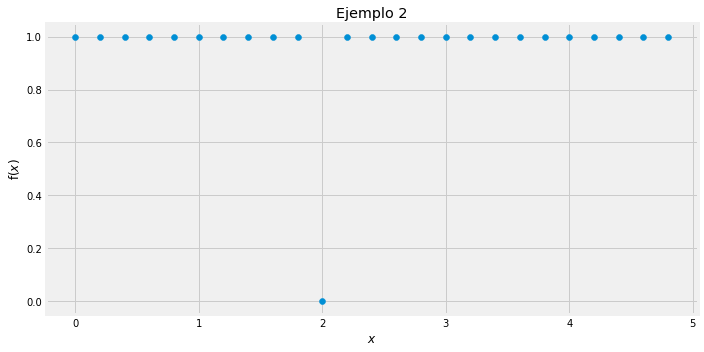

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo semiabierto [0, 5), 
# que va del 0.0 al 5.0 con pasos de 0.2
x = np.arange(0., 5., 0.2)          
# Codominio: a los valores generados en el intervalo anterior, les aplicamos la 
# función a trozos del ejemplo 2: iteramos sobre el intervalo anterior y vamos 
# creando una lista que contiene un 0; si la intrada i del intervalo anterior 
# es un 2.0, colocamos un 0 en dicha lista, pero si la entrada i del intervalo
# anterior no es un 2.0, colocamos un 0. Iteramos sobre dicho intervalo tal cual
# lo creamos, es decir, en forma ascendente
y = [ 0 if i == 2 else 1 for i in x] # Codominio

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Ejemplo 2', 
        'xlabel':'$x$',
        'ylabel':'f($x$)'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos en la figura un diagrama de dispersión para mostrar la función
# a trozos que acabamos de generar 
graf.scatter(x=x, y=y, par={'label':'f($x$)'})
# mostramos la figura que contiene la gráfica 
graf.show()

Esta función es muy particular, pues obsérvese que el conjunto $A$ (el dominio) tiene 24 elementos igualmente espaciados que van de 0 a 4.8; por otro lado el conjunto $B$ solo contiene dos elementos, el 1 y el 0. La mayoría de los elementos de $A$ son transformados en el valor 1 cuando se aplica la función $f$ y solo el valor $x=2$ se transforma en 0. 

¿En este ejemplo podemos decir que $f$ es una función? Revisa la definición y responde a esta pregunta.

### Ejemplo 3

Sea $f(x) = x^2$ para $x \in \mathbb{R}$. En este caso el dominio son todos los números reales, ¿cuál será el codominio?

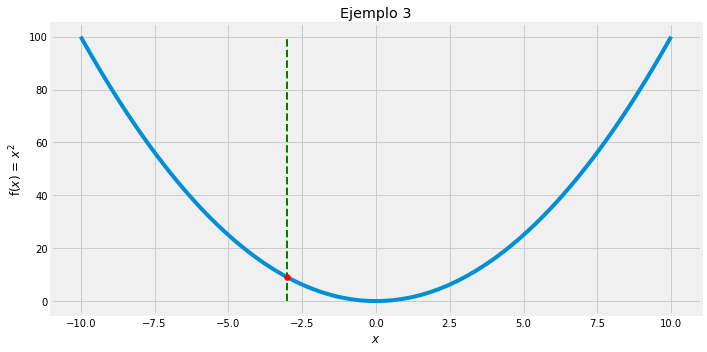

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo cerrado [-10, 10], 
# que va del -10 al 10 con 100 muestras
x = np.linspace(-10,10,100) 
# Codominio: del rango de valores que acabamos de crear, evaluamos cada uno en 
# la función f(x)=x^2, es decir, cada entrada la elevamos al cuadrado
y = x**2                    

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Ejemplo 3', 
        'xlabel':'$x$',
        'ylabel':'f($x$) = $x^2$'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos la función f(x)=x^2
graf.plot(x=x, y=y)

N = -3.0
# graficamos en la figura una línea vertical punteada de color verde en x = -3
graf.plot(x = [N, N], y=[0, 10**2], 
          par={'ls':'--', 'lw':2, 'color':'green'})
# graficamos en la figura un punto rojo en el (-3,9)
graf.scatter(x = [N], y=[N**2],
            par = {'marker':'o', 'color':'red', 'zorder':10})
# mostramos la figura que contiene la gráfica, la recta vertical y el punto rojo
graf.show()

En la gráfica anterior se observa que el codominio son solo los números reales positivos, incluyendo el cero. Esto lo podemos escribir matemáticamente como $B = \mathbb{R}^+ \cup \{0\}$, donde $\mathbb{R}^+$ es el subconjunto de los números reales tales que si $y \in \mathbb{R}^+$ entonces $y > 0$.

Observe que cualquier línea vertical solo intersecta a la función en un solo punto. Intente cambiar el valor de `N` entre -10 y 10, vea el resultado. 

Por lo tanto $f(x) = x^2$ es una función. ¿La inversa de $f$ será una función también?

De manera simplista podemos decir que si tenemos una función $f: A \rightarrow B$, entonces su inversa debería ser: $g: B \rightarrow A$. Por lo tanto, si $x \in A$, entonces $f(x) = y$ con $y \in B$; y dado que $g$ es la inversa de $f$ entonces $g(y) = \pm \sqrt x$.

Básicamente lo que se está haciendo con la inversa es "intercambiar" el dominio con el contradominio. Esto lo podemos hacer y graficar fácilmente en Python como sigue:

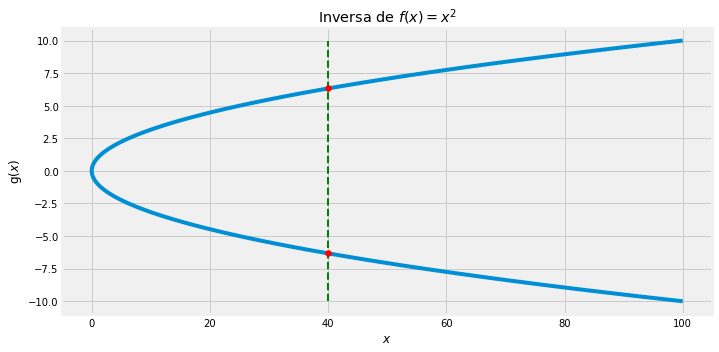

In [ ]:
xi = y   # Tomamos el codominio y lo ponemos en el dominio xi
yi = x   # Tomamos el dominio de f y lo ponemos en el codominio yi

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Inversa de $f(x)=x^2$', 
        'xlabel':'$x$',
        'ylabel':'g($x$)'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# creamos la gráfica de la función inversa
graf.plot(x=xi, y=yi)

N = 40.0
# graficamos en la figura una línea vertical punteada de color verde en x = 40
graf.plot(x = [N, N], y=[-10, 10], 
          par={'ls':'--', 'lw':2, 'color':'green'})
# graficamos en la figura dos puntos rojos: en el (40,-sqrt(40)) y (40,sqrt(40))
graf.scatter(x = [N, N], y=[np.sqrt(N), -np.sqrt(N)],
            par = {'marker':'o', 'color':'red', 'zorder':10})
# mostramos la figura que contiene la gráfica, la recta vertical y los puntos rojos
graf.show()

Observe que esta definición de $g$ genera una curva que no cumple con la definición de función, pues cualquier recta vertical (para x > 0) interseca a la curva de $g$ en dos puntos.

Una definición más formal de función inversa la puedes consultar
<a href="./02_Funciones_formalismos_y_ejemplos.ipynb">aquí. </a>

### Ejemplo 4: función logística
La función logística genera una curva en forma de S y es una función que suele usarse para modelar diversos comportamientos como la difusión de información en redes sociales, crecimiento de poblaciones, propagación de enfermedades, entre otras. Su definición es la siguiente:

$\displaystyle
f(x) = \frac{1}{1+e^{-x}}
$

Su gráfica en el intervalo $x \in [-10,10]$ es la siguiente:

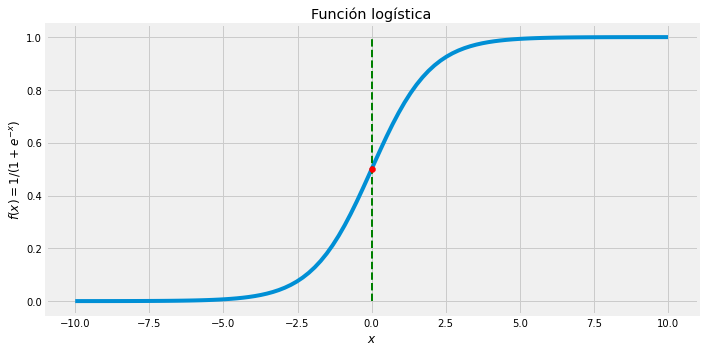

In [ ]:
# Dominio: creamos un rango de valores dentro del intervalo cerrado [-10, 10], 
# que va del -10 al 10 con 100 muestras
x = np.linspace(-10,10,100) 
# Codominio: del rango de valores que acabamos de crear, evaluamos cada uno en 
# la función logística
y = 1 / (1 + np.exp(-x))

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Función logística', 
        'xlabel':'$x$',
        'ylabel':'$f(x) = 1 /(1+e^{-x})$'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# creamos la gráfica de la función logística
graf.plot(x=x, y=y)

N = 0.0
# graficamos en la figura una línea vertical punteada de color verde en x = 0
graf.plot(x = [N, N], y=[0, 1], 
          par={'ls':'--', 'lw':2, 'color':'green'})
# graficamos en la figura un punto rojo en el (0,1/(1+e^{-0}))
graf.scatter(x = [N], y=[1/(1+np.exp(-N))],
            par = {'marker':'o', 'color':'red', 'zorder':10})
# mostramos la figura que contiene la gráfica, la recta vertical y el punto rojo
graf.show()

Cuando esta función se usa para describir un modelo de crecimiento de poblaciones, se observa que al principio se tiene un crecimiento exponencial (véase la función exponencial); posteriomente aparece la competencia entre individuos de la población por algún recurso crítico, de tal manera que el crecimiento disminuye; finalmente se llega a la madurez de la población y el crecimiento se detiene. Todos estos comportamientos se pueden ver la gráfica anterior.

¿Se podrá modelar el negocio de los chilaquiles con esta función? Veamos:

Escribimos la función logística de la siguiente manera: $\displaystyle
f(x) = \frac{a}{b+e^{-(x-c)}}
$
donde los parámetros $a, b$ y $c$ se deben ajustar para modelar la venta de chilaquiles.
Fijemos $a = 30$ y $b=0.5$ y variamos $c$ en $[1,2,3,4,5]$. Grafiquemos estas curvas y los datos de las ventas de chilaquiles:


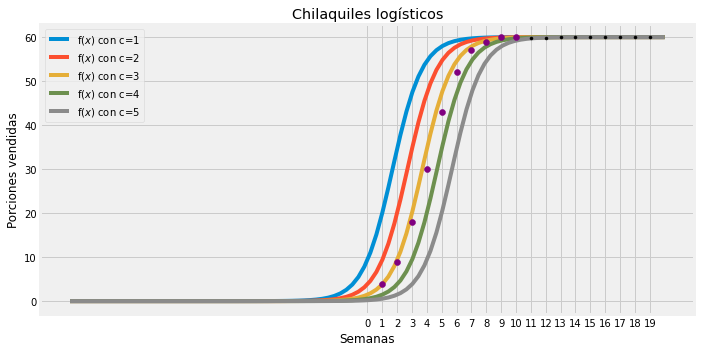

In [ ]:

# creamos la función chilogisticos que recibe los argumentos a, b, c, x  y retornamos un número, 
# que es la valuación de la función logística de la forma en la que la acabamos de escribir 
def chilogisticos(a,b,c,x):
    return a / (b + np.exp(-1*(x-c)))

# Dominio: creamos un rango de valores dentro del intervalo cerrado [-20, 20], 
# que va del -20 al 20 con 100 muestras
x = np.linspace(-20,20,100) 
# indicamos un valor particular de a
a = 30
# indicamos un valor particular de b
b = 0.5 

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Chilaquiles logísticos', 
        'xlabel':'Semanas',
        'ylabel':'Porciones vendidas'}]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)

# en el ciclo for colocamos distintos valores de c, que van desde c = 1 hasta c = 5 con pasos de 1
for c in range(1,6):
    # Codominio: valuamos todos los valores de x en la función chilogisticos, donde a y b
    # los acabamos de establecer y la c va cambiando von base en la iteración del ciclo for
    y = chilogisticos(a,b,c,x)     
    # graficamos cada función con cada valor de c, con base en la iteración del ciclo for, indicando
    # la etiqueta (label de cada gráfica)
    graf.plot(x=x, y=y, par={'label':'f($x$) con c='+ str(c)})

# graficamos en la figura un diagrama de dispersión para mostrar las 
# porciones vendidas de los chilaquiles de la semana correspondiente,
# es decir, de la gráfica de la función que creamos al principio
graf.scatter(x=semanas, y=porciones, par={'color':'purple', 'zorder':5})

# creamos un rango de valores dentro del intervalo semiabierto [11, 20), 
# que va del 11 al 20 con pasos de 1
xpred = np.arange(11,20,1)

# graficamos un diagrama de dispersión que corresponde a la función chilogisticos valuada
# en xpred con c = 5 (el último valor de c que generó el ciclo for). Los puntos del
# diagrama son negros y tienen un tamaño más chico al diagrama de las porciones vendidas
graf.scatter(x=xpred, y=chilogisticos(a,b,c,xpred), par={'color':'black', 
                                                         'zorder':5, 
                                                         'marker':'.'})

# las etiquetas del eje x van a ser los números de cada semana, que van de la 0 
# a la semana 19
graf.ticks(xticks = [i for i in range(20)])
# indicamos que queremos mostrar en la figura la leyenda de las seis gráficas
graf.legend()
# mostramos la figura que contiene las gráficas que acabamos de generar
graf.show()

Como se puede observar, es posible modelar la venta de chilaquiles usando una función de tipo logístico. Solo se deben encontrar los valores adecuados de $a$, $b$ y $c$. En las graficas anteriores, la curva que más se acerca es aquella con $c=3$ (pruebe con 3.5). 

Lo que se puede ver es que después de que las ventas alcanzan 60 porciones por semana, ya no hay un incremento y se estabilizan en ese valor (ver los puntos negros). Es probable que ya se hayan alcanzado a todos los clientes posibles que gustan de chilaquiles, por lo que el negocio no se ve que crezca mucho en el futuro. Por lo tanto, la respuesta a la pregunta de si es mejor dejar la Universidad y dedicarse al negocio de chilaquiles es negativa (al menos con este modelo).  



#Evalúa tus conocimientos

Si deseas contestar un breve cuestionario en el que podrás evaluar un poco del conocimiento aquirido en este notebook da clic [aquí.](https://forms.gle/hfvtjr6Qx8xhhP449)

## Referencias

* Spivak, M., & Marqués, B. F. (1988). Cálculo Infinitesimal. Reverté. 
* Stewart, J., Redlin, L., & Watson, Saleem. (2012). Precalculo: Matemáticas para el cálculo. Cengage Learning.
* Avella, D., & Campero, G. (2017). Curso introductorio de Álgebra I. Papirhos, IM-UNAM.